In [1]:
from dotenv import load_dotenv
import getpass
import os


# Завантажуємо змінні середовища з файлу .env
load_dotenv()

def _set_env(var: str):
    # Перевіряємо, чи змінна вже встановлена
    env_value = os.getenv(var)
    if not env_value:
        # Якщо не встановлена, запитуємо користувача
        env_value = getpass.getpass(f"{var}: ")
        # Встановлюємо змінну для поточного середовища
        os.environ[var] = env_value
    return env_value

# Отримуємо значення змінних середовища
langchain_api_key = _set_env("LANGCHAIN_API_KEY")
openai_api_key = _set_env("OPENAI_API_KEY")
anthropic_api_key = _set_env("ANTHROPIC_API_KEY")

In [2]:
!pip install -qU duckduckgo-search

 Why I Chose DuckDuckGo Search

1. **Free and Open Source**: DuckDuckGo Search is completely free to use and doesn't require an API key, making it accessible for personal and small-scale projects.
2. **Simple and Easy to Use**: The library is straightforward to integrate, with minimal setup required. It provides a clean interface for performing searches.
3. **Privacy-Focused**: DuckDuckGo doesn’t track users or store personal data, ensuring privacy and anonymity in search queries.
4. **No Rate Limits**: Unlike many other search APIs, DuckDuckGo doesn’t impose strict rate limits, making it suitable for projects requiring frequent searches.
5. **Global Coverage**: It provides search results from a wide range of sources worldwide, ensuring comprehensive and diverse results.
6. **Customizable**: Supports parameters like region, time period, and search type (e.g., news, images, videos), allowing for tailored search results.
7. **No Ads**: DuckDuckGo search results are ad-free, ensuring clean and relevant results without commercial bias.
8. **Lightweight**: The library is lightweight and doesn’t add significant overhead to the application.

These advantages make DuckDuckGo Search an excellent choice for projects that prioritize simplicity, privacy, and cost-effectiveness.

In [6]:
from langchain_community.tools import DuckDuckGoSearchResults
import warnings


warnings.filterwarnings("ignore", category=UserWarning, module="langchain_community.utilities.duckduckgo_search")

tool = DuckDuckGoSearchResults()
tool.invoke("Obama")

'snippet: A comprehensive overview of the 44th president of the United States, his achievements, policies, and controversies. Learn about his election, inauguration, administration, judicial appointments, domestic and foreign affairs, and legacy., title: Presidency of Barack Obama - Wikipedia, link: https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama, snippet: Barack Obama (born August 4, 1961, Honolulu, Hawaii, U.S.) is the 44th president of the United States (2009–17) and the first African American to hold the office. Before winning the presidency, Obama represented Illinois in the U.S. Senate (2005–08)., title: Barack Obama | Biography, Parents, Education, Presidency, Books ..., link: https://www.britannica.com/biography/Barack-Obama, snippet: Learn about the life and achievements of Barack Obama, the 44th President of the United States and the first African American to hold the office. Explore his background, family, education, political career, and legacy., title: Barack Obam

In [8]:
tool.invoke({"args": {"query":"latest economic news in Ukraine"}, "id": "1", "name": tool.name, "type": "tool_call"})

ToolMessage(content="snippet: The Kyiv Post Delivers Exclusive and In-Depth News and Opinions on Politics, Economics – Get Your Daily News Brief Direct from Ukraine Today!, title: Get the Latest Ukraine News Today - KyivPost, link: https://www.kyivpost.com/, snippet: Reports about recent developments in Ukraine's economy and in the world. News from companies, banks and financial organizations, decisions taken by the authorities that influence the macroeconomic and microeconomic situation., title: Economy - Interfax-Ukraine - news from Ukraine and the world, link: https://en.interfax.com.ua/news/economic.html, snippet: Russia's invasion causes huge upheaval for Ukraine's economy; Thousands of companies move from east to west; Heavy industries decimated, other sectors manage to adapt, title: War upends Ukraine's economy in a shift that may be permanent, link: https://www.reuters.com/world/europe/war-upends-ukraines-economy-shift-that-may-be-permanent-2024-05-09/, snippet: Ukraine. Explor

In [11]:
import pprint
results = tool.invoke("latest economic news in Ukraine")
pprint.pprint(results)

('snippet: The Kyiv Post Delivers Exclusive and In-Depth News and Opinions on '
 'Politics, Economics – Get Your Daily News Brief Direct from Ukraine Today!, '
 'title: Get the Latest Ukraine News Today - KyivPost, link: '
 'https://www.kyivpost.com/, snippet: Reports about recent developments in '
 "Ukraine's economy and in the world. News from companies, banks and financial "
 'organizations, decisions taken by the authorities that influence the '
 'macroeconomic and microeconomic situation., title: Economy - '
 'Interfax-Ukraine - news from Ukraine and the world, link: '
 "https://en.interfax.com.ua/news/economic.html, snippet: Russia's invasion "
 "causes huge upheaval for Ukraine's economy; Thousands of companies move from "
 'east to west; Heavy industries decimated, other sectors manage to adapt, '
 "title: War upends Ukraine's economy in a shift that may be permanent, link: "
 'https://www.reuters.com/world/europe/war-upends-ukraines-economy-shift-that-may-be-permanent-2024-05-

In [19]:
import asyncio
from langchain_community.tools import DuckDuckGoSearchResults

# Create the search tool
search = DuckDuckGoSearchResults()

# Asynchronous function to perform the search
async def async_search(query):
    """
    Perform an asynchronous search using DuckDuckGoSearchResults.
    
    Args:
        query (str): The search query.
    
    Returns:
        list: A list of search results.
    """
    results = await search.ainvoke(query)  # Use ainvoke for asynchronous invocation
    return results


query = "latest political news in Ukraine"
# Run the asynchronous code
result = await async_search(query)
pprint.pprint(result)

('snippet: News from Ukraine. Articles, political analysis, investigations, '
 'reports, economic and sports news. Ukrainska Pravda, founded in April 2000, '
 'is one of the oldest and most respected Ukrainian news agencies., title: '
 'Ukrainska Pravda - online news about Ukraine, link: '
 'https://www.pravda.com.ua/eng/, snippet: Three children were killed and 62 '
 'injured by Russian attacks, Mayor Ihor Terekhov reported. Suspended gas '
 'transit has early impact west of the Dniester; Renowned scientists among '
 'victims of New Year’s air strike; Ukraine says Russia suffered 427K '
 'casualties in 2024, as Russian gains taper., title: Get the Latest Ukraine '
 'News Today - KyivPost, link: https://www.kyivpost.com/, snippet: Follow the '
 'latest news about the Russia Ukraine war. Find reports from the ground, '
 'verified videos, maps and expert analysis by BBC correspondents across the '
 'world., title: Ukraine War | Latest News & Updates| BBC News, link: '
 'https://www.bbc.c

In [24]:

query = 'latest sports news in Great Britain'
results = await async_search(query)
pprint.pprint(results)

('snippet: Katie Boulter loses epic clash to Iga Swiatek as Great Britain '
 'crash out of United Cup, title: Sport : Latest & breaking Sport news | GB '
 'News, link: https://www.gbnews.com/sport/, snippet: Sports news and live '
 'sports coverage including scores, results, video, audio and analysis on '
 'Football, F1, Cricket, Rugby Union and all other UK sports., title: BBC '
 'Sport - Scores, Fixtures, News - Live Sport, link: '
 'https://www.bbc.co.uk/sport, snippet: Sports news and live sports coverage '
 'including scores, results, video, audio and analysis on Football, F1, '
 'Cricket, Rugby Union and all other UK sports., title: Scores, Fixtures, News '
 '- Live Sport - BBC, link: https://www.bbc.com/sport, snippet: The home of '
 'England Sport on BBC Sport online. Includes the latest news stories, '
 'results, fixtures, video and audio., title: England - BBC Sport, link: '
 'https://www.bbc.com/sport/england')


In [29]:
search = DuckDuckGoSearchResults(output_format="list", backend="news")
query = 'latest sports news in Great Britain'
results = await async_search(query)
pprint.pprint(results)

[{'date': '2025-01-02T04:00:00+00:00',
  'link': 'https://www.outlookindia.com/sports/tennis/great-britain-vs-poland-live-streaming-united-cup-quarter-final-3-when-where-to-watch-tie-on-tv-and-online-katie-boulter-vs-iga-swiatek',
  'snippet': 'Great Britain will face Poland in the third quarter-final match '
             'of the United Cup in Sydney on Thursday. Here are the live '
             'streaming, fixtures and other details of the tennis matches',
  'source': 'Outlookindia',
  'title': 'Great Britain Vs Poland Live Streaming, United Cup QF 3: When, '
           'Where To Watch Tennis Tie'},
 {'date': '2025-01-01T09:35:00+00:00',
  'link': 'https://www.msn.com/en-us/sports/other/katie-boulter-seals-quarter-final-place-for-great-britain-at-united-cup/ar-AA1wNqku',
  'snippet': 'Katie Boulter seals quarter-final place for Great Britain at '
             'United Cup - One straight-sets victory was enough for Britain to '
             'guarantee topping their group in Sydney.',
  

In [39]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

wrapper = DuckDuckGoSearchAPIWrapper(region="uk-en", time="d")

search = DuckDuckGoSearchResults(api_wrapper=wrapper, output_format="list", backend = 'news')

res = search.invoke("latest sports news")
pprint.pprint(res)

[{'date': '2025-01-03T07:05:00+00:00',
  'link': 'https://www.bbc.co.uk/sport/football/live/c4glk04744qt',
  'snippet': 'All the latest football team news, transfers, manager news '
             'conferences and build-up as Manchester United go to leaders '
             'Liverpool on Sunday.',
  'source': 'BBC',
  'title': 'Premier League news conferences, team news and build-up'},
 {'date': '2025-01-02T17:44:46+00:00',
  'link': 'https://www.msn.com/en-gb/sport/football/rangers-v-celtic-live-scottish-premiership-team-news-line-ups-and-more-today/ar-AA1wQPxr',
  'snippet': 'The first Old Firm derby of 2025 sees Rangers trying to close a '
             '14-point gap to their rivals at the top of the table',
  'source': 'The Independent on MSN.com',
  'title': 'Rangers v Celtic LIVE: Scottish Premiership team news, line-ups '
           'and more today'},
 {'date': '2025-01-02T15:26:00+00:00',
  'link': 'https://www.skysports.com/football/news/11696/13280871/transfer-news-january-transfe

Two Approaches to Using DuckDuckGo Search
1. Direct Function Approach
Description: In this approach, I directly used the DuckDuckGoSearchAPIWrapper and DuckDuckGoSearchResults tools to perform searches without involving an LLM (Language Model).

Advantages:

Simplicity: Easy to implement and understand.

No LLM Dependency: Doesn’t require an LLM, making it lightweight and cost-effective.

Fast Execution: Directly interacts with the search API, providing quick results.

In [51]:
import asyncio
from datetime import datetime
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults
import pprint
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="langchain_community.utilities.duckduckgo_search")

# Function to format date from ISO format (e.g., '2025-01-03T07:05:00+00:00') to 'day month year' (e.g., '03 January 2025')
def format_date(date_str: str) -> str:
    """
    Formats a date string from ISO format to 'day month year'.

    Args:
        date_str (str): The date string in ISO format.

    Returns:
        str: The formatted date string (e.g., '03 January 2025').
    """
    # Parse the ISO date string into a datetime object
    date_obj = datetime.fromisoformat(date_str)
    # Format the datetime object into 'day month year'
    return date_obj.strftime("%d %B %Y")

# Asynchronous function to perform a news search using DuckDuckGo
async def search_news(query: str, region: str , time: str):
    """
    Performs an asynchronous news search using DuckDuckGo.

    Args:
        query (str): The search query (e.g., 'latest sports news').
        region (str, optional): The region for the search. Default is 'wt-wt' (worldwide).
        time (str, optional): The time period for the search. Default is 'd' (last day).

    Returns:
        list: A list of search results, where each result is a dictionary.
    """
    # Create a DuckDuckGo API wrapper with the specified region and time period
    wrapper = DuckDuckGoSearchAPIWrapper(region=region, time=time)
    
    # Create a search tool using the API wrapper
    search = DuckDuckGoSearchResults(api_wrapper=wrapper, output_format="list", backend="news")
    
    # Perform the asynchronous search and return the results
    results = await search.ainvoke(query)
    return results

# Function to print search results in a clean, readable format
def print_results(results: list):
    """
    Prints search results in a structured and readable format.

    Args:
        results (list): A list of search results, where each result is a dictionary.
    """
    print("Search Results:")
    # Iterate through the results and print each one
    for i, result in enumerate(results, 1):
        # Format the date using the format_date function
        formatted_date = format_date(result["date"])
        
        # Print the result details
        print(f"Result #{i}:")
        print(f"  Title: {result['title']}")
        print(f"  Link: {result['link']}")
        print(f"  Snippet: {result['snippet']}")
        print(f"  Source: {result['source']}")
        print(f"  Date: {formatted_date}")
        print("-" * 152)  # Separator line for readability

# Main asynchronous function to execute the search and display results
async def main_search(query, region: str = "wt-wt", time: str = "w"):
    """
    Main function to execute the search and print the results.
    """
    
    async def search_news(query: str, region: str , time: str):
        """
        Performs an asynchronous news search using DuckDuckGo.
    
        Args:
            query (str): The search query (e.g., 'latest sports news').
            region (str, optional): The region for the search. Default is 'wt-wt' (worldwide).
            time (str, optional): The time period for the search. Default is 'd' (last day).
    
        Returns:
            list: A list of search results, where each result is a dictionary.
        """
        # Create a DuckDuckGo API wrapper with the specified region and time period
        wrapper = DuckDuckGoSearchAPIWrapper(region=region, time=time)
        
        # Create a search tool using the API wrapper
        search = DuckDuckGoSearchResults(api_wrapper=wrapper, output_format="list", backend="news")
        
        # Perform the asynchronous search and return the results
        results = await search.ainvoke(query)
        return results
    
    # Perform the search
    results = await search_news(query, region=region, time=time)
    
    # Print the results
    print_results(results)
    return results


In [52]:
# Define the search query
query = "latest economic news"

# Set the region (e.g., 'uk-en' for the UK) and time period (e.g., 'd' for the last day)
region = "us-en"
time = "d"

results = await main_search(query,region,time)

Search Results:
Result #1:
  Title: Friday's Economic Calendar
  Link: https://www.msn.com/en-us/money/markets/friday-s-economic-calendar/ar-AA1wT7ox
  Snippet: ISM Manufacturing Index The manufacturing composite index from the Institute for Supply Management is a diffusion index calculated from five of the eleven sub-components of a monthly survey of purchasing managers at roughly 300 manufacturing firms nationwide.
  Source: MSN
  Date: 03 January 2025
--------------------------------------------------------------------------------------------------------------------------------------------------------
Result #2:
  Title: Dollar headed for best week since November on US rates, economic outlook
  Link: https://www.reuters.com/markets/currencies/dollar-headed-best-week-since-november-us-rates-economic-outlook-2025-01-03/
  Snippet: The dollar was on track for its best weekly performance in over a month on Friday, underpinned by expectations of fewer Federal Reserve rate cuts this year 

2. LLM-Agent Approach
Description: Here, I integrated DuckDuckGo Search with an LLM (e.g., GPT-4o-mini) using LangGraph. The LLM acts as an agent that refines the search query and processes the results.

Advantages:

Query Refinement: The LLM improves the search query for better results.

Advanced Processing: The LLM can analyze, summarize, or format the search results.


In [109]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, RemoveMessage
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from datetime import datetime
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition

tools = [search_news]
tool_node = ToolNode(tools)
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)
# Define the query improvement function

@tool
async def search_news(query: str, region: str = "wt-wt", time: str = "w"):
        """
        Performs an asynchronous news search using DuckDuckGo.
    
        Args:
            query (str): The search query (e.g., 'latest sports news').
            region (str, optional): The region for the search. Default is 'wt-wt' (worldwide).
            time (str, optional): The time period for the search. Default is 'd' (last day).
    
        Returns:
            list: A list of search results, where each result is a dictionary.
        """
        # Create a DuckDuckGo API wrapper with the specified region and time period
        wrapper = DuckDuckGoSearchAPIWrapper(region=region, time=time)
        
        # Create a search tool using the API wrapper
        search = DuckDuckGoSearchResults(api_wrapper=wrapper, output_format="list", backend="news")
        
        # Perform the asynchronous search and return the results
        results = await search.ainvoke(query)
        return results


async def improve_query(state: MessagesState) -> MessagesState:
    
    current_date = datetime.now().strftime("%d %B %Y")
    QUERY_IMPROVEMENT_PROMPT = """You are a search query optimization assistant. 
    Current date: {current_date}
    
    Your task is to improve the given search query to get better news results.
    Consider:
    - Adding relevant keywords
    - Removing unnecessary words
    - Focusing on the main topic
    - Including time-relevant terms (recent, latest, etc.)
    - Using location-specific terms when relevant
    
    Original query: {query}
    
    Provide the improved query without any explanations, just the query text."""
    
    query_improvement_prompt = PromptTemplate.from_template(QUERY_IMPROVEMENT_PROMPT)
    messages = state["messages"]
    original_query = messages[-1].content
    
    # Get improved query from AI
    chain = query_improvement_prompt | model | StrOutputParser()
    improved_query = await chain.ainvoke({"query": original_query, "current_date": current_date})

    return {"messages": [improved_query]}

def agent(state: MessagesState):

    messages = state["messages"]
    model_with_tools = model.bind_tools(tools)
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

    


In [122]:
# Функція для форматування дати
def format_date(date_str: str) -> str:

    # Парсимо дату з ISO формату
    date_obj = datetime.fromisoformat(date_str)
    # Форматуємо дату у 'day month year'
    return date_obj.strftime("%d %B %Y")


def print_results(results: list):

    print("Search Results:")
    # Ітеруємо через результати і виводимо кожен
    for i, result in enumerate(results, 1):
        # Форматуємо дату за допомогою функції format_date
        formatted_date = format_date(result["date"])
        
        # Виводимо деталі результату
        print(f"Result #{i}:")
        print(f"  Title: {result['title']}")
        print(f"  Link: {result['link']}")
        print(f"  Snippet: {result['snippet']}")
        print(f"  Source: {result['source']}")
        print(f"  Date: {formatted_date}")
        print("-" * 152)  # Роздільник для читабельності

import json  # Додано для десеріалізації JSON

# Функція для форматування результатів
async def format_results(state: MessagesState) -> MessagesState:
    """
    Форматує результати пошуку та виводить їх у зручному форматі.

    Args:
        state (MessagesState): Стан графу, що містить результати пошуку.

    Returns:
        MessagesState: Оновлений стан графу.
    """
    messages = state["messages"]
    # Отримуємо результати пошуку з останнього повідомлення
    results_str = messages[-1].content
    
    # Десеріалізуємо результати з JSON у список словників
    try:
        results = json.loads(results_str)
    except json.JSONDecodeError:
        print("Error: Results are not in valid JSON format.")
        return state
    
    # Виводимо результати у зручному форматі
    print_results(results)


In [123]:
workflow = StateGraph(MessagesState)
# Add nodes
workflow.add_node("improve_query", improve_query)
workflow.add_node("agent", agent) 
workflow.add_node("tools", tool_node)
workflow.add_node("format_results", format_results)
# Define edges

workflow.add_edge(START, 'improve_query')
workflow.add_edge('improve_query', 'agent')
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition)
workflow.add_edge("tools", "format_results")
workflow.add_edge("format_results", END)

graph = workflow.compile()

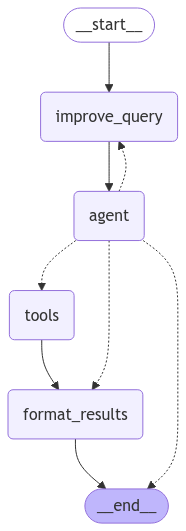

In [115]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [124]:
#input_message =  "financial situation in UK"
inputs = {"messages": [("human", "financial situation in the USA")]}
async for step in graph.astream(
    inputs,
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

financial situation in the USA
================================ Human Message =================================

latest financial news USA January 2025
================================== Ai Message ==================================
Tool Calls:
  search_news (call_3qQPceebMbHZHU1ZgPwp49TR)
 Call ID: call_3qQPceebMbHZHU1ZgPwp49TR
  Args:
    query: financial news USA
    region: wt-wt
    time: d
================================= Tool Message =================================
Name: search_news

[{"snippet": "The man suspected in the attack in New Orleans had a checkered marital history punctuated by multiple divorces and financial difficulty, according to court records.", "title": "New Orleans attack suspect Shamsud-Din Jabbar's divorce filings point to financial difficulties", "link": "https://abcnews.go.com/US/suspect-new-orleans-attack-divorce-marriage-history/story?id=117262365", "date": "2025-01-02T14

Why the Simple Functional Approach is Better in This Case
Simplicity: The direct functional approach is easier to implement and maintain, especially for straightforward search tasks.

No LLM Dependency: It avoids the complexity and cost of integrating an LLM, making it more lightweight and cost-effective.

Faster Execution: Directly interacting with the DuckDuckGo API provides quicker results without the overhead of LLM processing.

Privacy: Since DuckDuckGo is privacy-focused, using it directly ensures no additional data is shared with third-party LLM services.

Arguments in the Function to Improve Responses
To enhance the search results without using an LLM, you can leverage the following arguments provided by the DuckDuckGoSearchAPIWrapper and DuckDuckGoSearchResults tools:

1. query
Purpose: The search query string.

Improvement Tip:

Use specific and descriptive keywords.

Include time-sensitive terms like "latest," "recent," or "2024" for up-to-date results.

Add location-specific terms (e.g., "in the UK") for region-focused results.

2. region
Purpose: Specifies the region for the search (e.g., 'us-en' for the US, 'uk-en' for the UK, 'wt-wt' for worldwide).

Improvement Tip:

Set the region to match the target audience or topic (e.g., 'uk-en' for UK-specific news).

3. time
Purpose: Filters results by time period (e.g., 'd' for the last day, 'w' for the last week, 'm' for the last month).

Improvement Tip:

Use 'd' for the most recent results.

Use 'w' or 'm' for broader but still recent results.